# Ethereum Classic Price

In [1]:
import csv
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('../data/raw/bitcoin/ethereum_classic_price.csv')

In [3]:
df.tail()

,Date,Open,High,Low,Close,Volume,Market Cap
404,"Jul 28, 2016",1.560000,1.920000,1.370000,1.730000,"40,291,300","128,530,000"
405,"Jul 27, 2016",2.460000,2.460000,1.260000,1.600000,"62,645,700","202,315,000"
406,"Jul 26, 2016",0.604737,2.850000,0.600358,2.550000,"103,066,000","49,768,300"
407,"Jul 25, 2016",0.931993,0.932862,0.452446,0.602402,"9,308,400","76,700,600"
408,"Jul 24, 2016",0.752345,0.959354,0.737342,0.928814,"17,769,300",-


In [4]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Market Cap'], dtype='object')

In [5]:
df.count()

Date          409
Open          409
High          409
Low           409
Close         409
Volume        409
Market Cap    409
dtype: int64

In [6]:
df.dtypes

Date           object
Open          float64
High          float64
Low           float64
Close         float64
Volume         object
Market Cap     object
dtype: object

There is a missing data here and there are several data which have different format. Some of the data do not use number format

In [7]:
df['Volume'] = df['Volume'].apply(lambda x: float(str(x).replace(',',''))) 
df['Market Cap'] = df['Market Cap'].replace('-', 'NaN')
df['Market Cap'] = df['Market Cap'].apply(lambda x: float(str(x).replace(',',''))) 

In [8]:
df.tail()

,Date,Open,High,Low,Close,Volume,Market Cap
404,"Jul 28, 2016",1.560000,1.920000,1.370000,1.730000,40291300.0,128530000.0
405,"Jul 27, 2016",2.460000,2.460000,1.260000,1.600000,62645700.0,202315000.0
406,"Jul 26, 2016",0.604737,2.850000,0.600358,2.550000,103066000.0,49768300.0
407,"Jul 25, 2016",0.931993,0.932862,0.452446,0.602402,9308400.0,76700600.0
408,"Jul 24, 2016",0.752345,0.959354,0.737342,0.928814,17769300.0,NaN


In [9]:
df.count()

Date          409
Open          409
High          409
Low           409
Close         409
Volume        409
Market Cap    408
dtype: int64

Convert time column into date time format

In [10]:
df['Date'] = pd.to_datetime(df['Date'])

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 409 entries, 0 to 408
Data columns (total 7 columns):
Date          409 non-null datetime64[ns]
Open          409 non-null float64
High          409 non-null float64
Low           409 non-null float64
Close         409 non-null float64
Volume        409 non-null float64
Market Cap    408 non-null float64
dtypes: datetime64[ns](1), float64(6)
memory usage: 22.4 KB


In [12]:
missingdf = pd.DataFrame(df.isna().sum()).rename(columns = {0: 'total'})
missingdf['percent'] = missingdf['total'] / len(df)
missingdf

,total,percent
Date,0,0.000000
Open,0,0.000000
High,0,0.000000
Low,0,0.000000
Close,0,0.000000
Volume,0,0.000000
Market Cap,1,0.002445


<function matplotlib.pyplot.show(*args, **kw)>

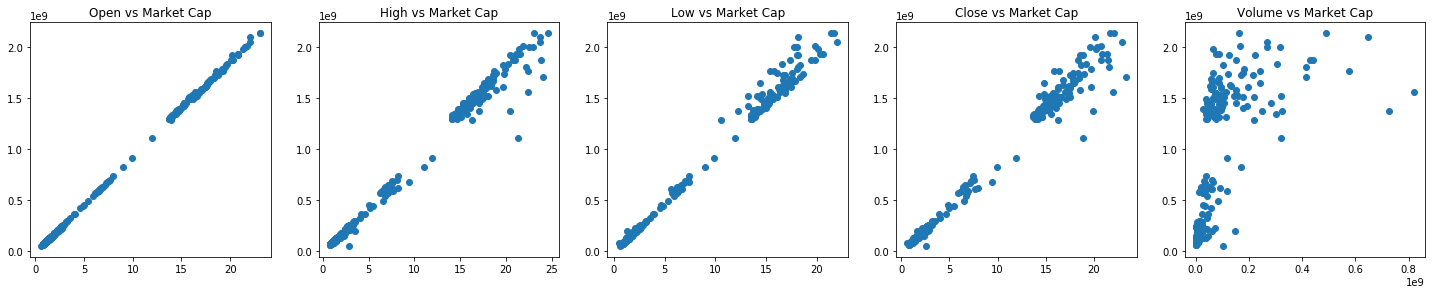

In [14]:
#Plot data to see the relation between each column
import matplotlib.pyplot as plt
plt.figure(figsize=(25, 25))
O = df['Open']
H = df['High']
L = df['Low']
C = df['Close']
V = df['Volume']
MC = df['Market Cap']

plt.subplot(5,5,1)
plt.scatter(O, MC)
plt.title('Open vs Market Cap')

plt.subplot(5,5,2)
plt.scatter(H, MC)
plt.title('High vs Market Cap')

plt.subplot(5,5,3)
plt.scatter(L, MC)
plt.title('Low vs Market Cap')

plt.subplot(5,5,4)
plt.scatter(C, MC)
plt.title('Close vs Market Cap')

plt.subplot(5,5,5)
plt.scatter(V, MC)
plt.title('Volume vs Market Cap')

plt.show

To fill the NaN value I try to interpolate the data using linear method using value from Open column. Because from the figure above we can see that Market Cap has linear condition with Open.

In [20]:
from sklearn import linear_model

model = linear_model.LinearRegression()
Open  = df[['Open']].iloc[0:407]
Market_Cap = df['Market Cap'].iloc[0:407]

In [21]:
#Train model 
model.fit(Open, Market_Cap)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [22]:
#The model score almost 1 so that indicate the model is near to the truth
model.score(Open, Market_Cap)

0.99976948194746

In [23]:
#Add a new column which is filled the missing data from model fit
open = df[['Open']]
Market_Cap_Predict = model.predict(open)
df['Market Cap Predict'] = Market_Cap_Predict
df.tail()

,Date,Open,High,Low,Close,Volume,Market Cap,Market Cap Predict
404,2016-07-28,1.560000,1.920000,1.370000,1.730000,40291300.0,128530000.0,1.365646e+08
405,2016-07-27,2.460000,2.460000,1.260000,1.600000,62645700.0,202315000.0,2.211221e+08
406,2016-07-26,0.604737,2.850000,0.600358,2.550000,103066000.0,49768300.0,4.681504e+07
407,2016-07-25,0.931993,0.932862,0.452446,0.602402,9308400.0,76700600.0,7.756163e+07
408,2016-07-24,0.752345,0.959354,0.737342,0.928814,17769300.0,NaN,6.068322e+07


Here I make a new column Market Cap Predict which contains Market Cap with no NaN value

In [24]:
df.count()

Date                  409
Open                  409
High                  409
Low                   409
Close                 409
Volume                409
Market Cap            408
Market Cap Predict    409
dtype: int64

The data is clean, no null value and has same format